In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
# df = df.iloc[:,:-1]
df.shape

(8, 2)

In [2]:
df.head()

,Hours,Risk Score
0,10,95
1,9,80
2,2,10
3,15,50
4,10,45


In [3]:
df.describe()

,Hours,Risk Score
count,8.000000,8.000000
mean,11.125000,63.625000
std,4.673252,32.429869
min,2.000000,10.000000
25%,9.750000,43.250000
50%,10.500000,65.000000
75%,15.250000,93.500000
max,16.000000,98.000000


Text(0, 0.5, 'Risk score on a scale of 0-100')

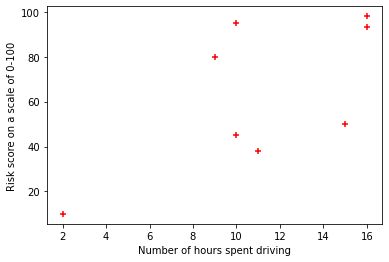

In [4]:
plt.scatter(df['Hours'],df['Risk Score'],color="red", marker = "+")
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on a scale of 0-100')

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:, 1].values
x.shape

(8, 1)

In [14]:
x

array([[10],
       [ 9],
       [ 2],
       [15],
       [10],
       [16],
       [11],
       [16]])

In [7]:
y

array([95, 80, 10, 50, 45, 98, 38, 93])

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [9]:
y_pred = lr.predict(x)
y_pred

array([58.46361406, 53.87571545, 21.76042518, 81.40310711, 58.46361406,
       85.99100572, 63.05151267, 85.99100572])

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_pred)
print(r2)

0.43709481451010035


Text(0, 0.5, 'Risk score on a scale of 0-100')

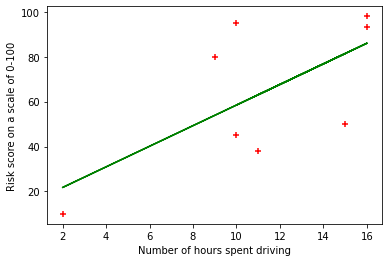

In [16]:
plt.scatter(x,y,color="red", marker="+")
plt.plot(x,y_pred,color="green")
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on a scale of 0-100')

In [16]:
print("Coefficients-")
print('Intercept (b0) :', lr.intercept_)
print('Slope (b1) :' ,lr.coef_)

Coefficients-
Intercept (b0) : 12.584627964022907
Slope (b1) : [4.58789861]


#Without using sklearn
By using Least Square method
y_pred = b0 + b1*x <br>

In [17]:
x_mean,y_mean = np.mean(x),np.mean(y)     

In [18]:
n=0
d=0
for i in range(0,8):
    n+=((x[i][0]-x_mean)*(y[i]-y_mean))
    d+=(x[i][0]-x_mean)**2 

In [19]:
b1 = n/d
b0 = y_mean-b1*x_mean

In [20]:
print("Intercept (b0) = {} \nSlope (b1) = {}".format(b0,b1))

Intercept (b0) = 12.584627964022893 
Slope (b1) = 4.58789860997547


Text(0, 0.5, 'Risk score on a scale of 0-100')

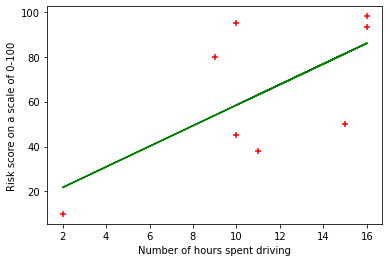

In [21]:
plt.scatter(x,y, color="red", marker="+")
y_pred = b0+b1*x
    
plt.plot(x,y_pred, color="green")
plt.xlabel('Number of hours spent driving')
plt.ylabel('Risk score on a scale of 0-100')